/home/brianformento/anaconda3/envs/ultrasound/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 25/25 [00:02<00:00, 10.79it/s]


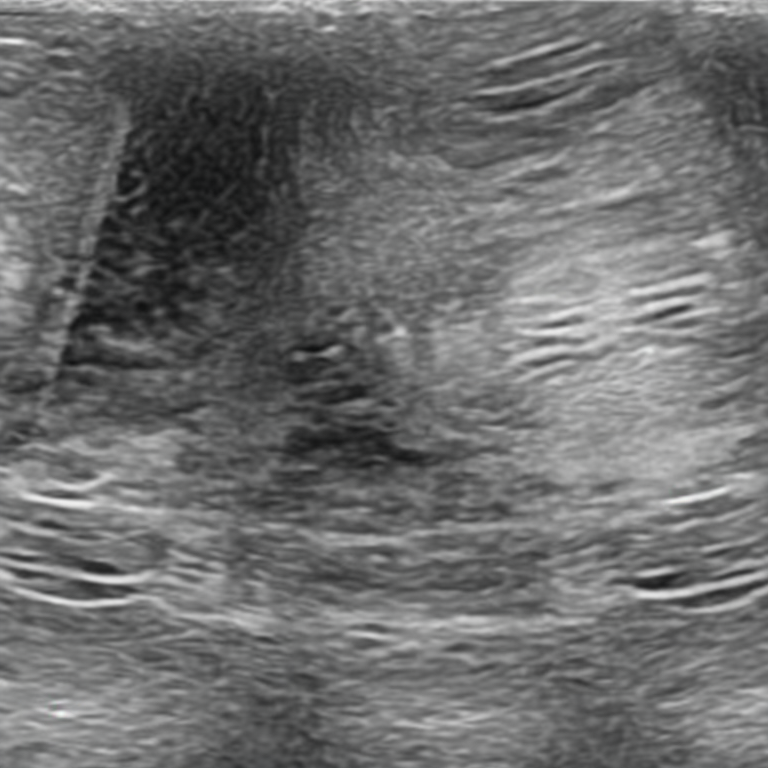

In [1]:
from diffusers import DiffusionPipeline, DPMSolverMultistepScheduler
import torch

pipe = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2", torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe.to("cuda")

# pipe.unet.load_attn_procs("patrickvonplaten/lora_dreambooth_dog_example")
pipe.unet.load_attn_procs("path_to_saved_model")

image0 = pipe("ultrasound image of breast with cancer malignant", num_inference_steps=25).images[0]

image0

In [2]:

from diffusers  import StableDiffusionImg2ImgPipeline, EulerDiscreteScheduler
from diffusers import DiffusionPipeline, DPMSolverMultistepScheduler
import torch


device = "cuda" if torch.cuda.is_available() else "cpu"
# Step 2: Create the pipeline with your UNet model
model_id =  "stabilityai/stable-diffusion-2"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_id, torch_dtype=torch.float16)



# pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
# pipe.to(device)

pipe.scheduler = EulerDiscreteScheduler.from_config(pipe.scheduler.config)
pipe.to("cuda")

pipe.unet.load_attn_procs("path_to_saved_model")

print (pipe)


Loading pipeline components...: 100%|██████████| 6/6 [00:02<00:00,  2.71it/s]


StableDiffusionImg2ImgPipeline {
  "_class_name": "StableDiffusionImg2ImgPipeline",
  "_diffusers_version": "0.20.0.dev0",
  "_name_or_path": "stabilityai/stable-diffusion-2",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "requires_safety_checker": false,
  "safety_checker": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "EulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}



In [8]:
# pipe.scheduler = EulerDiscreteScheduler.from_config(pipe.scheduler.config)
# pipe.to("cuda")
from PIL import Image
from pathlib import Path
import torch
import re

steps = 20
scale = 9
num_images_per_prompt = 1
# seed = torch.randint(0, 1000000, (1,)).item()
seed = 9
generator = torch.Generator(device=device).manual_seed(seed)

# images = ["/home/brianformento/Dataset_BUSI_with_GT/normal/normal (1).png",
# "/home/brianformento/Dataset_BUSI_with_GT/benign/benign (1).png" ,
#  "/home/brianformento/Dataset_BUSI_with_GT/malignant/malignant (1).png"]

images = ["/home/brianformento/Dataset_BUSI_with_GT/normal/normal (5).png",
"/home/brianformento/Dataset_BUSI_with_GT/normal/normal (6).png" ,
 "/home/brianformento/Dataset_BUSI_with_GT/normal/normal (7).png"]

init_images = [Image.open(image).convert("RGB").resize((768,768)) for image in images] 

for i in init_images:
   i.imgshow()

prompts = ["ultra sound image of breast with malignant cancer",
           "ultra sound image of breast with malignant cancer", 
           "ultra sound image of breast with malignant cancer"]

negative_prompts = ["ultrasound scanning device",
                    "ultrasound scanning device",
                    "ultrasound scanning device"]

output =  pipe(prompts, negative_prompt=negative_prompts, image=init_images, num_inference_steps=steps,
guidance_scale=scale, num_images_per_prompt=num_images_per_prompt, generator=generator)



DIR_NAME="./images_generated/"
dirpath = Path(DIR_NAME)
# create parent dir if doesn't exist
dirpath.mkdir(parents=True, exist_ok=True)

def slugify(text):
   text = re.sub(r"[^\w\s]", "", text)
   text = re.sub(r"\s+", "-", text)
   return text

for idx, (image,prompt) in enumerate(zip(output.images, prompts*num_images_per_prompt)):
    image_name = f'{slugify(prompt)}-{idx}.png'
    image_path = dirpath / image_name
    image.save(image_path)


Error: no "view" rule for type "image/png" passed its test case
       (for more information, add "--debug=1" on the command line)
Error: no "view" rule for type "image/png" passed its test case
       (for more information, add "--debug=1" on the command line)
Error: no "view" rule for type "image/png" passed its test case
       (for more information, add "--debug=1" on the command line)
100%|██████████| 16/16 [00:02<00:00,  6.07it/s]
